# LSTM Encoder

RNN model to encode an abstract and predict the gender of the study

In [3]:
%store -r abstracts_w2v_embeddings abstracts_targets_collapsed

### Training Data

In [4]:
from sklearn.cross_validation import train_test_split

X_idxs = list(abstracts_targets_collapsed.abstracts_idxed)
ys = abstracts_targets_collapsed.gender_binarized
X_train, X_val, ys_train, ys_val = train_test_split(X_idxs, ys)
num_classes = len(ys.unique())

### Train

Building theano graph...
Done!
Loss, Accuracy = (5.74115604015, 0.200381679389)
Loss, Accuracy = (5.69021145337, 0.353053435115)
Loss, Accuracy = (5.6322091361, 0.564885496183)
Loss, Accuracy = (5.56746522358, 0.704198473282)
Loss, Accuracy = (5.48812376999, 0.784351145038)
Loss, Accuracy = (5.38950964149, 0.80534351145)
Loss, Accuracy = (5.30148842574, 0.833969465649)
Loss, Accuracy = (5.22164652596, 0.843511450382)
Loss, Accuracy = (5.1669501893, 0.854961832061)
Loss, Accuracy = (5.10495883481, 0.864503816794)
Loss, Accuracy = (5.070400527, 0.864503816794)
Loss, Accuracy = (5.03365738618, 0.86641221374)
Loss, Accuracy = (5.01892998343, 0.86641221374)
Loss, Accuracy = (4.99526371303, 0.868320610687)
Loss, Accuracy = (4.97711327341, 0.870229007634)
Loss, Accuracy = (4.96161651469, 0.87213740458)
Loss, Accuracy = (4.95047610754, 0.87213740458)
Loss, Accuracy = (4.93758228271, 0.874045801527)
Loss, Accuracy = (4.92742334286, 0.874045801527)
Loss, Accuracy = (4.91691748156, 0.874045801527

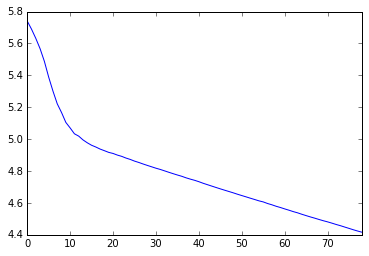

In [6]:
from rnn.train import RNNTrainer

trainer = RNNTrainer(abstracts_w2v_embeddings, num_classes=num_classes, cell_type='lstm')

trainer.train(X_train, ys_train, X_val, ys_val, reg=0.001, val_every=100)

pd.Series(trainer.val_loss).plot()